# Introduction to ML in Python

In scientific ML, the first (and often most important step) is to find the "right" representation of your data that helps you better interpret the signals you are recieving and the physics at play. Below we will explore some astrophysically relevant datasets and different simple representations.

However, step 1 as always is to import our standard packages and set up our plotting environment so we can visualize what is going on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Plotting Style
%matplotlib inline
plt.style.use('dark_background')

# PCA of Stellar Spectra

Our first example will be Principal Component Analysis (PCA) of stellar spectra from LAMOST. You are seeing the number of photons (how much light) is coming from the star as a function of wavelength (color). The exact color signature of a star can tell you a lot about the internal composition (which elements are present and in what abundance) and thus the active physics. I view this unsupervised technique as basically pointing your eyes towards what is "interesting" in the dataset for you to then interpret.

We will import the data from LAMOST after sky subtraction (removing emission and absorption lines from the earth atmosphere which can hide the absorption lines in the stellar atmosphere we are interested in). As is typical of astro data, this will involve FITS files.

In [2]:
from astropy.io import fits

Lets open a file and call `.info()` in order to see what is in it.

In [120]:
file = "/n/holystore01/LABS/finkbeiner_lab/Everyone/fink2/dfink/lamost/covargood/lamost-cleaned-01of10.fits"
hdul = fits.open(file)
hdul.info()
hdul.close()

Filename: /n/holystore01/LABS/finkbeiner_lab/Everyone/fink2/dfink/lamost/covargood/lamost-cleaned-01of10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (3801, 237512)   float32   
  1                1 ImageHDU         7   (3801, 237512)   float32   
  2                1 ImageHDU         7   (3801, 237512)   float32   
  3                1 ImageHDU         7   (3801, 237512)   float32   
  4                1 ImageHDU         7   (3801, 237512)   uint8   
  5                1 ImageHDU         6   (3801,)   float32   
  6                1 BinTableHDU    249   237512R x 116C   [36A, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, I, E, E, E, 4A, E, E, 4A, E, 3A, I, 15A, 10A, 48A, K, D, D, D, D, D, D, E, D, D, E, E, E, E, D, D

Where you download the file from should have some instructions about what is in each dataset. I know that the spectra we want are in the 3rd row (row 2) and are stellar spectra with 3801 wavelengths and we have 237512 different stars in the sample. The wavelengths (in angstroms) are in row 5.

In [127]:
# The handy getdata function is your friend.
spectra = fits.getdata(file,2)
waveL = fits.getdata(file,5)
#It is always a good idea to call shape as frequently as possible to make sure you know the form of your data
spectra.shape, waveL.shape

((237512, 3801), (3801,))

Always always plot your data to make sure it makes sense.

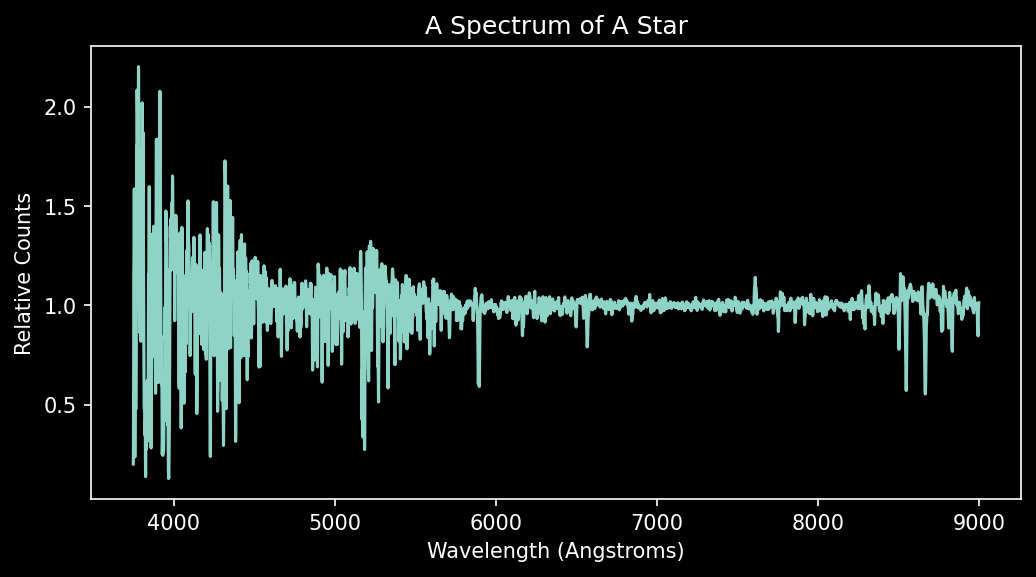

In [408]:
fig = plt.figure(figsize=(8,4), dpi=150)
ax = fig.add_subplot(1,1,1)
ax.plot(waveL, spectra[1,:])
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_title("A Spectrum of A Star");

Let's go get a PCA algorithim from sklearn (sci-kit learn). Only importing the functions you need from a package can help keep the namespace clean (Python does not have to look through a long list of functions to figure out which one you are talking about).

In [133]:
from sklearn.decomposition import PCA

Many transformations (PCA, LDA, etc.) in sklearn (and pytorch/many other packages) use the following style. You specify some parameter choices of your transformation to create a transformation object. You then call fit, or fit_transform on your data to actually execute the transformation.

In [409]:
pca = PCA(n_components=3)
#PCA (and python ML in general) expects the data in the form (nsamples, nfeatures)
H = pca.fit_transform(spectra[0:1000,:].T)
H.shape

(3801, 3)

Text(0.5, 1.0, 'Principal Component 3')

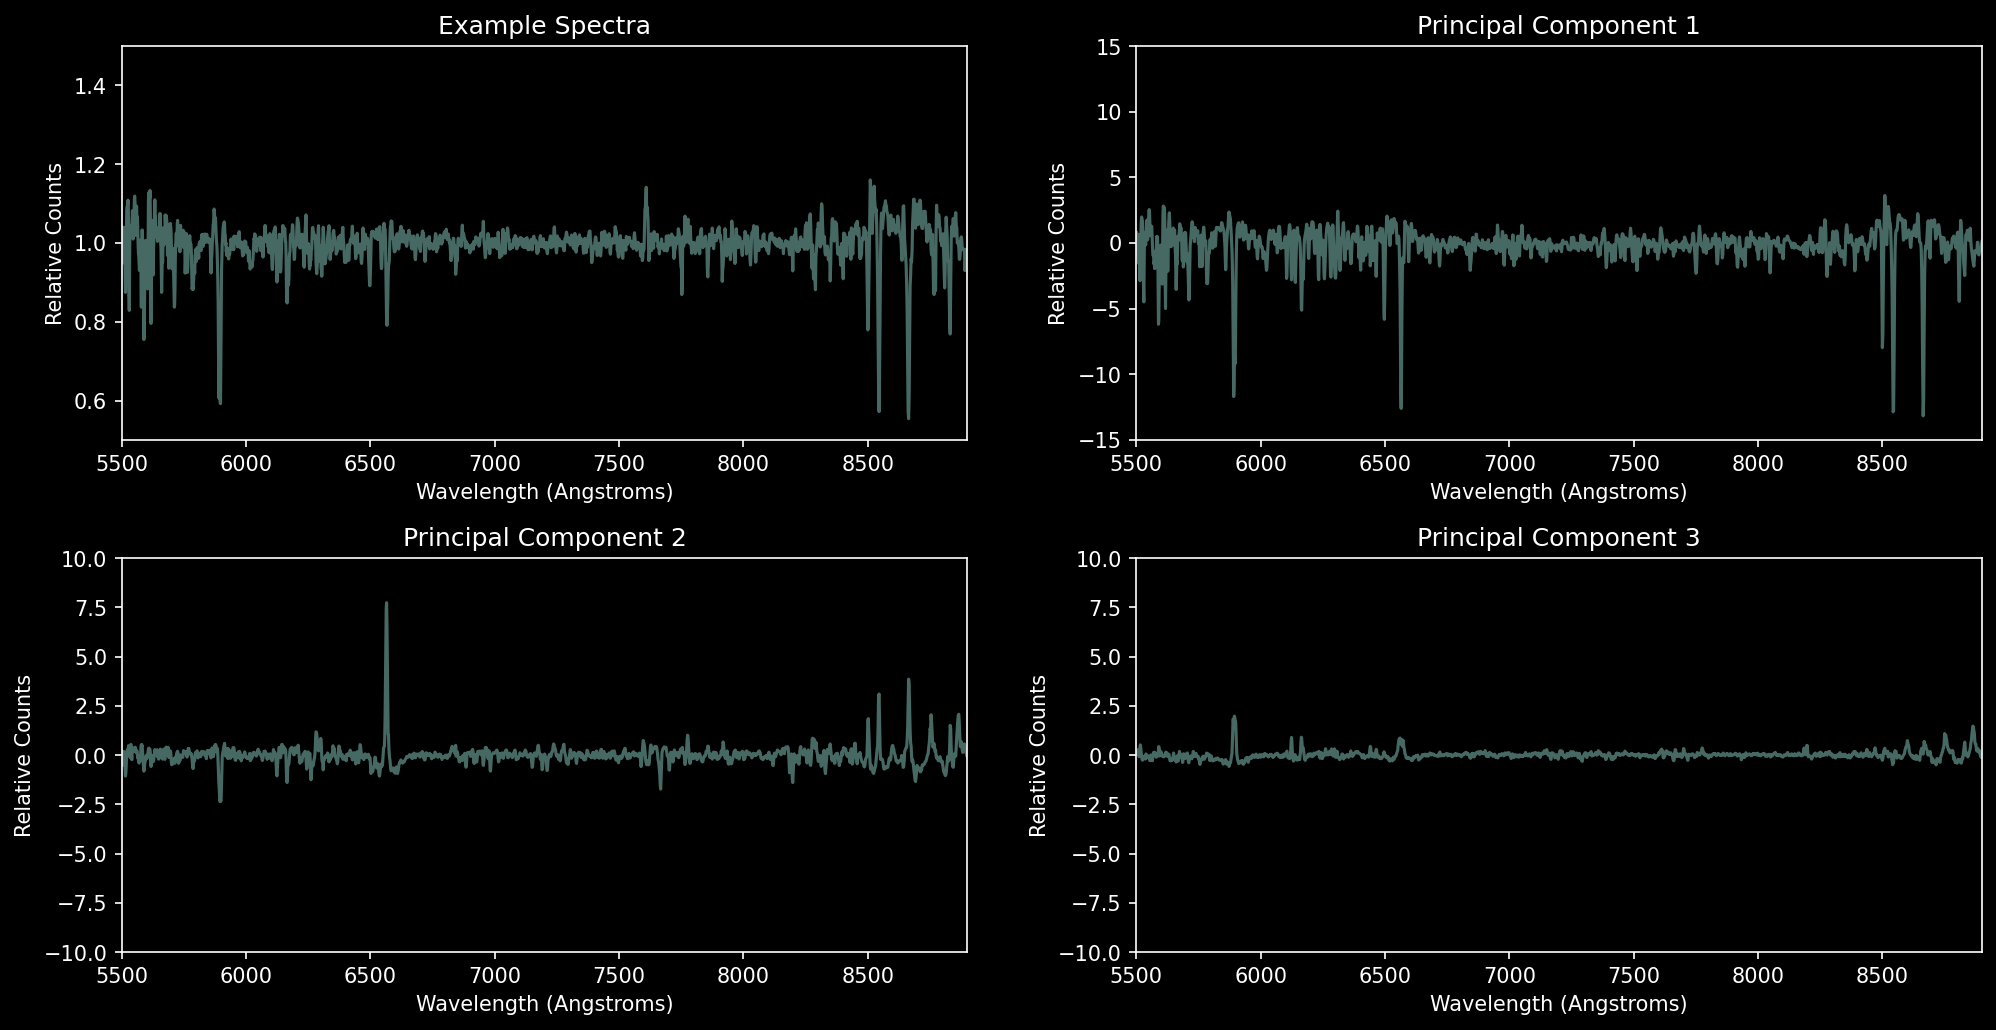

In [410]:
#
fig = plt.figure(figsize=(16,8), dpi=150)
plt.subplots_adjust(wspace=0.2,hspace=0.3)

ax = fig.add_subplot(2,2,1)
ax.plot(waveL,spectra[1,:],alpha=0.5)
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_xlim([5500, 8900])
ax.set_ylim([0.5, 1.5])
ax.set_title("Example Spectra")

ax = fig.add_subplot(2,2,2)
ax.plot(waveL,H[:,0],alpha=0.5)
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_xlim([5500, 8900])
ax.set_ylim([-15, 15])
ax.set_title("Principal Component 1")

ax = fig.add_subplot(2,2,3)
ax.plot(waveL,H[:,1],alpha=0.5)
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_xlim([5500, 8900])
ax.set_ylim([-10, 10])
ax.set_title("Principal Component 2")


ax = fig.add_subplot(2,2,4)
ax.plot(waveL,H[:,2],alpha=0.5);
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_xlim([5500, 8900])
ax.set_ylim([-10, 10])
ax.set_title("Principal Component 3")

But what does this mean? ML NEVER answers that question. It only helps you find patterns which COULD be meaningful

We know that some of the strongest elemental lines are Hydrogen and Sodium. Let's plot those on top of the principal components and see if anything pops out.

In [142]:
# These are some hydrogen lines in angstroms
balmer = [6562.79, 4861.35, 4340.472, 4101.734, 3970.075, 3889.064, 3835.397]
paschen = [8204]
# These are two very strong sodium lines in angstroms
sodium = [5889.95, 5895.924]
# Here are just convience lists so that the hydrogen lines will be red and the sodium lines green.
colorlist = ['r','r','g']
element_lists = [balmer,paschen,sodium]

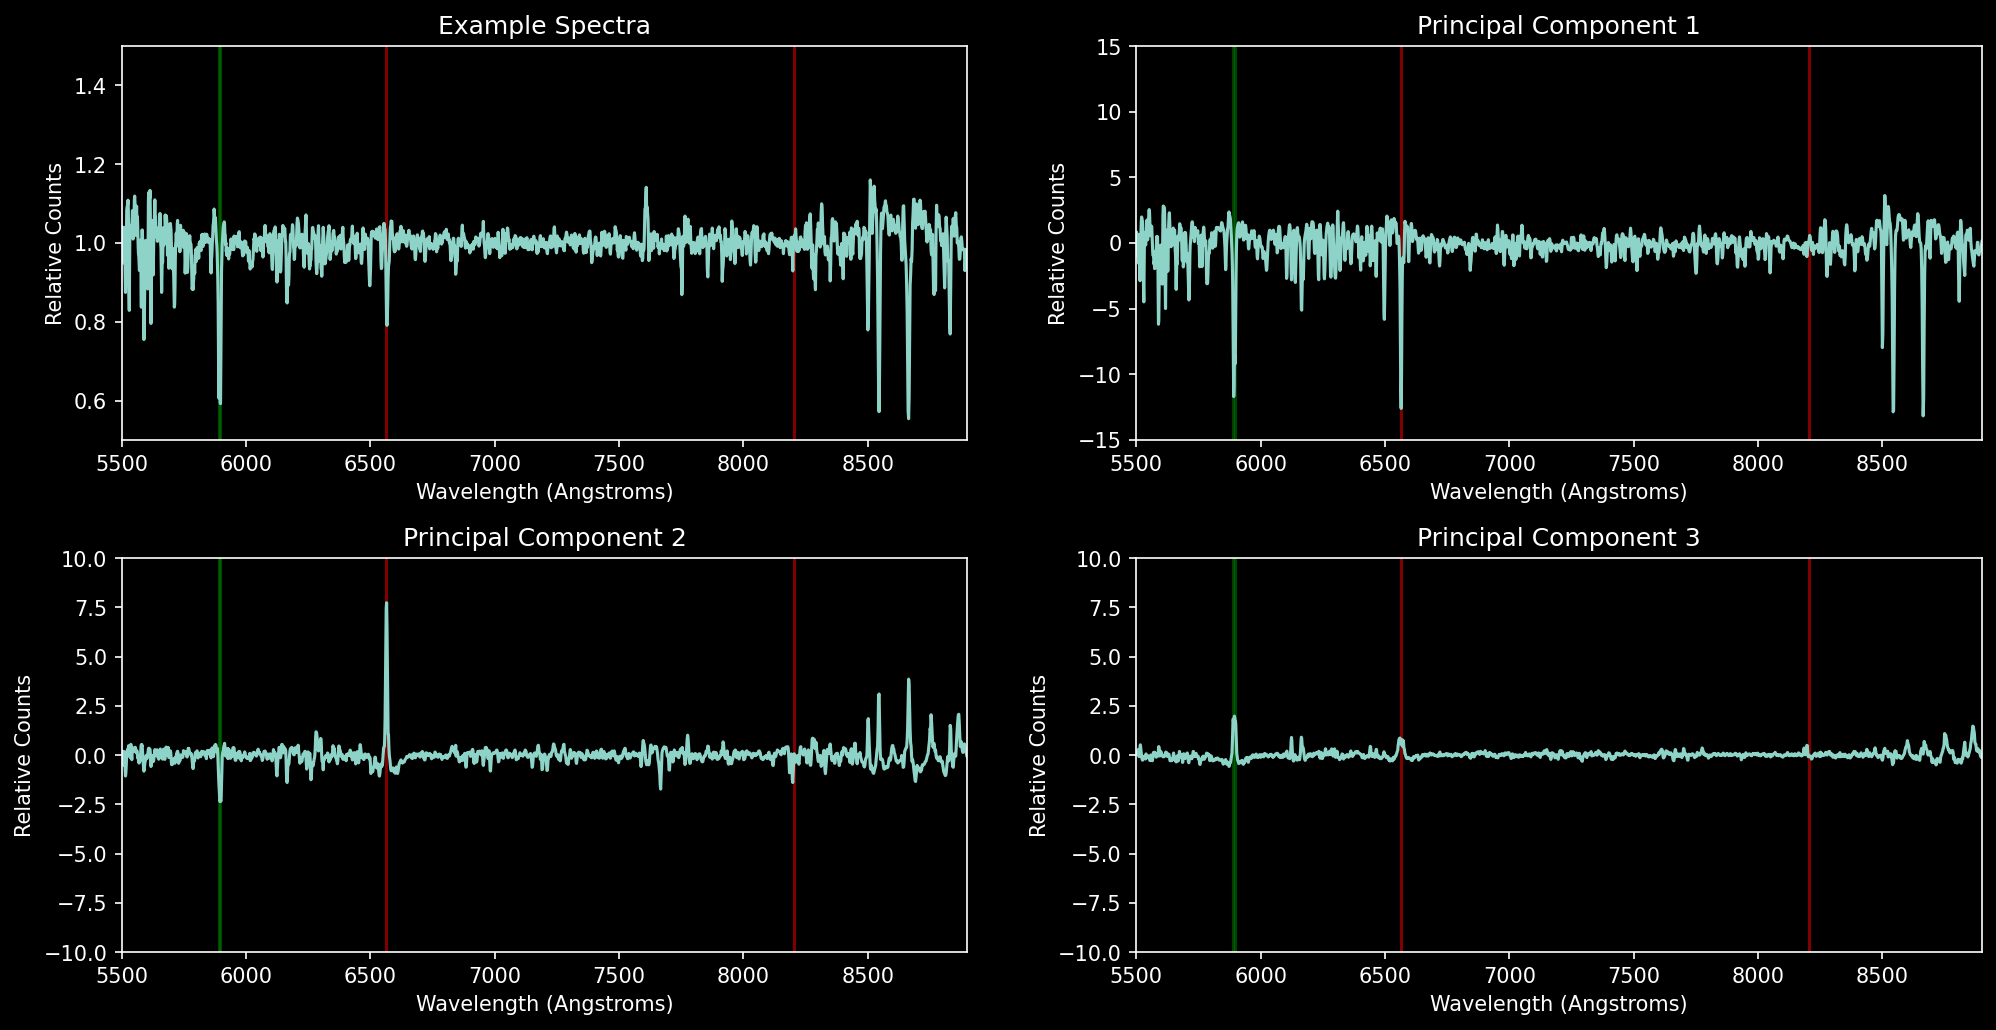

In [156]:
fig = plt.figure(figsize=(16,8), dpi=150)
plt.subplots_adjust(wspace=0.2,hspace=0.3)

ax = fig.add_subplot(2,2,1)
ax.plot(waveL,spectra[1,:])
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_xlim([5500, 8900])
ax.set_ylim([0.5, 1.5])
ax.set_title("Example Spectra")

for indx, ele in enumerate(element_lists):
    plt.vlines(ele,-20,20,colorlist[indx],alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.plot(waveL,H[:,0])
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_xlim([5500, 8900])
ax.set_ylim([-15, 15])
ax.set_title("Principal Component 1")

for indx, ele in enumerate(element_lists):
    plt.vlines(ele,-20,20,colorlist[indx],alpha=0.5)

ax = fig.add_subplot(2,2,3)
ax.plot(waveL,H[:,1])
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_xlim([5500, 8900])
ax.set_ylim([-10, 10])
ax.set_title("Principal Component 2")

for indx, ele in enumerate(element_lists):
    plt.vlines(ele,-20,20,colorlist[indx],alpha=0.5)

ax = fig.add_subplot(2,2,4)
ax.plot(waveL,H[:,2]);
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Relative Counts")
ax.set_xlim([5500, 8900])
ax.set_ylim([-10, 10])
ax.set_title("Principal Component 3")

for indx, ele in enumerate(element_lists):
    plt.vlines(ele,-20,20,colorlist[indx],alpha=0.5)

So, it appears a significant portion of the variance of these stellar spectra is explained by some stars having a different ratio of sodium to hydrogen. What does the 3rd PCA component mean? What do sodium and hydrogen appear to correlate with there... plot some more elemental lines and find out. Analyses like these led to the discovery of DIB (diffuse interstellar bands) which characterize dust in between stars and galaxies.

One final remark on PCA is that we often want to know how important the PCA components are to explaining the variation within the dataset. We can do that by simply looking at the `explained_variance_ratio_`

In [147]:
print(pca.explained_variance_ratio_)

[0.83254118 0.10408953 0.01727753]


This says that 83% of the variation in the spectra (after sky subtraction) is just a constant times PC1, so some notion of brightness. PC2 is 10% of the variation, and PC is 2%. Combined 95% of the variation in this set of spectra are explained by a linear combination of just these 3 components.

# LDA for Photometry Classification

While I wanted to show real data (Sec 2 + 4), it can be really nice to work with data and prepackaged tools where dataloading and formatting is much easier. There are some really nice astro-focused examples of these (and more complicated algorithims) in the astroML package. The example below slowly walks through one of the examples there using one of my favorite techniques, LDA. This is a supervised technique so we are using what we know about some datapoints to try to train a model to make predictions for others.

In [314]:
from astroML.datasets import fetch_rrlyrae_combined

In [315]:
X, y = fetch_rrlyrae_combined()

[========================================]  78.8kb / 78.8kb   
downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/master/datasets/stripe82calibStars_v2.6.dat.gz to /n/home12/saydjari/astroML_data
[=========================================]  63.58Mb / 63.58Mb   
uncompressing file...


These are 93141 stars and how much light was recieved from them in 4 different filters ("colors"). This is a dataset from SDSS (Sloane Digital Sky Survey) of which Harvard is a member. The columns are u-g, g-r, r-i, i-z which is actually the difference in the amount of light from the star in each wavelength range.

In [316]:
X.shape, y.shape

((93141, 4), (93141,))

In [317]:
y

array([0., 0., 0., ..., 1., 1., 1.])

y is the label vector. It tells us if a star is rrlyrae (1) or not (0). This is a very special class of variable star used to measure distances across large distances within the Milky Way. https://en.wikipedia.org/wiki/RR_Lyrae_variable

Detecting variable stars is hard... and expensive lots of time and repeated measurements. If we could tell which stars are likely to be rrlyrae just by the color from a single time point, we could focus our search. Can ML help with that?

In [318]:
from sklearn.model_selection import train_test_split

We are going to blind our algorithim to the test data, use only the train data, and see how it does on the test data. This is very important in ML to make sure that a model "generalizes." So, the first step in supervised learning is to do the "test-train split"

In [319]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [321]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62404, 4), (30737, 4), (62404,), (30737,))

In [339]:
import matplotlib.cm as cmplt

Here is the train and test set of stars plotted in 2 color dimensions in each panel. It is a bit hard to reprsent the 4D space. Note that the test stars look like they are distributed approximately like the train stars as we hope.

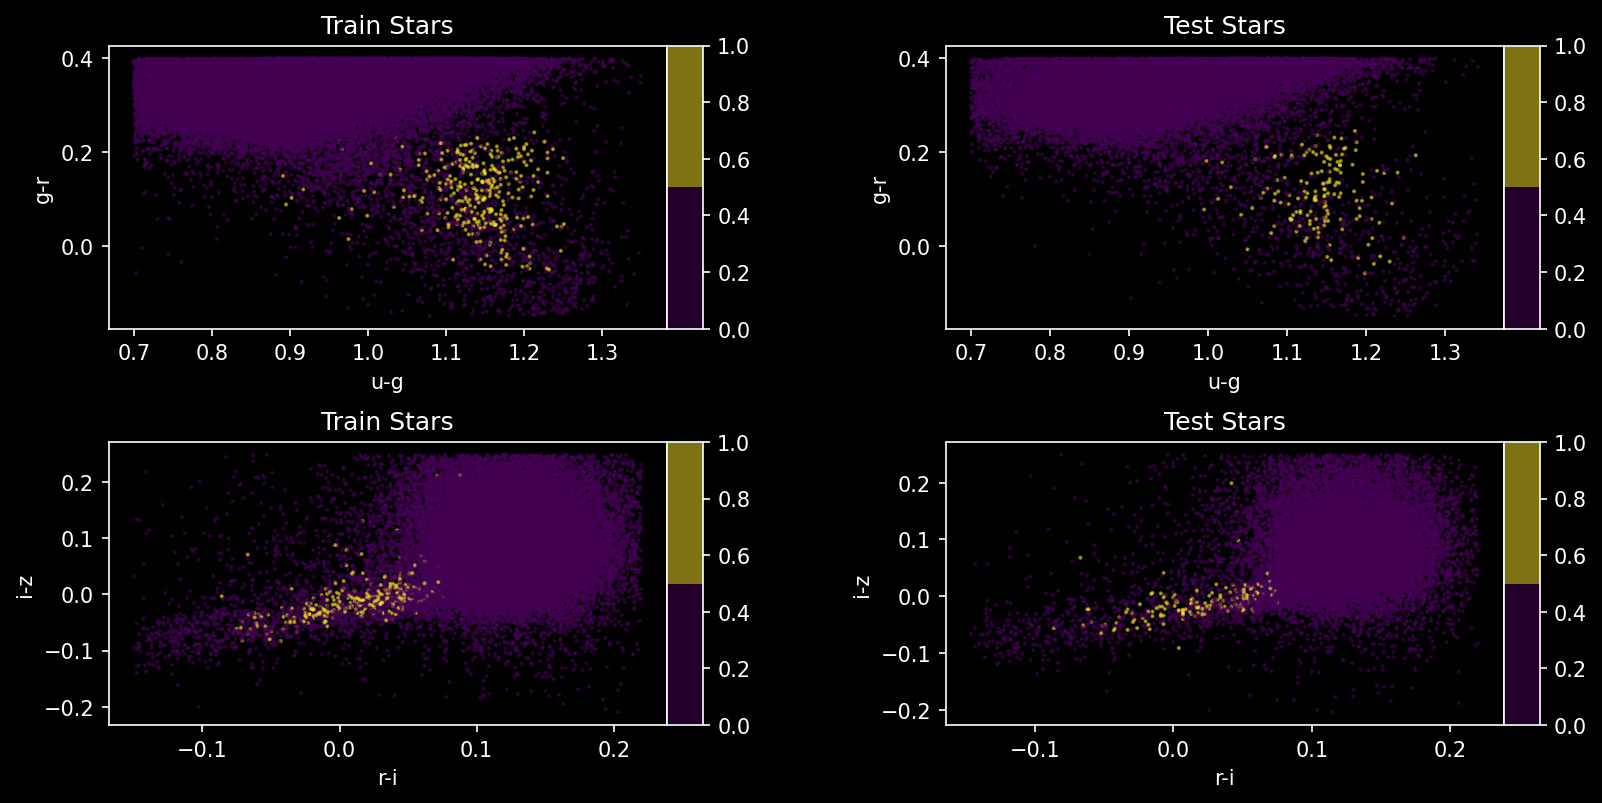

In [414]:
#
fig = plt.figure(figsize=(12,6), dpi=150)
cmap = cmplt.get_cmap("viridis", 2)

plt.subplots_adjust(wspace=0.5,hspace=0.4)
ax = fig.add_subplot(2,2,1)
sc = ax.scatter(X_train[:,0],X_train[:,1],s=1,c=y_train,alpha=0.5,cmap=cmap)
ax.set_xlabel("u-g")
ax.set_ylabel("g-r")
cax = fig.add_axes([ax.get_position().x1,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(sc, cax=cax)
ax.set_title("Train Stars")

ax = fig.add_subplot(2,2,2)
sc = ax.scatter(X_test[:,0],X_test[:,1],s=1,c=y_test,alpha=0.5,cmap=cmap)
ax.set_xlabel("u-g")
ax.set_ylabel("g-r")
cax = fig.add_axes([ax.get_position().x1,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(sc, cax=cax)

ax.set_title("Test Stars");

ax = fig.add_subplot(2,2,3)
sc = ax.scatter(X_train[:,2],X_train[:,3],s=1,c=y_train,alpha=0.5,cmap=cmap)
ax.set_xlabel("r-i")
ax.set_ylabel("i-z")
cax = fig.add_axes([ax.get_position().x1,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(sc, cax=cax)
ax.set_title("Train Stars")

ax = fig.add_subplot(2,2,4)
sc = ax.scatter(X_test[:,2],X_test[:,3],s=1,c=y_test,alpha=0.5,cmap=cmap)
ax.set_xlabel("r-i")
ax.set_ylabel("i-z")
cax = fig.add_axes([ax.get_position().x1,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(sc, cax=cax)

ax.set_title("Test Stars");

In [362]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [365]:
lda = LDA()
L = lda.fit_transform(X_train,y_train)
L.shape

(62404, 1)

In [369]:
y_pred = lda.predict(X_test)

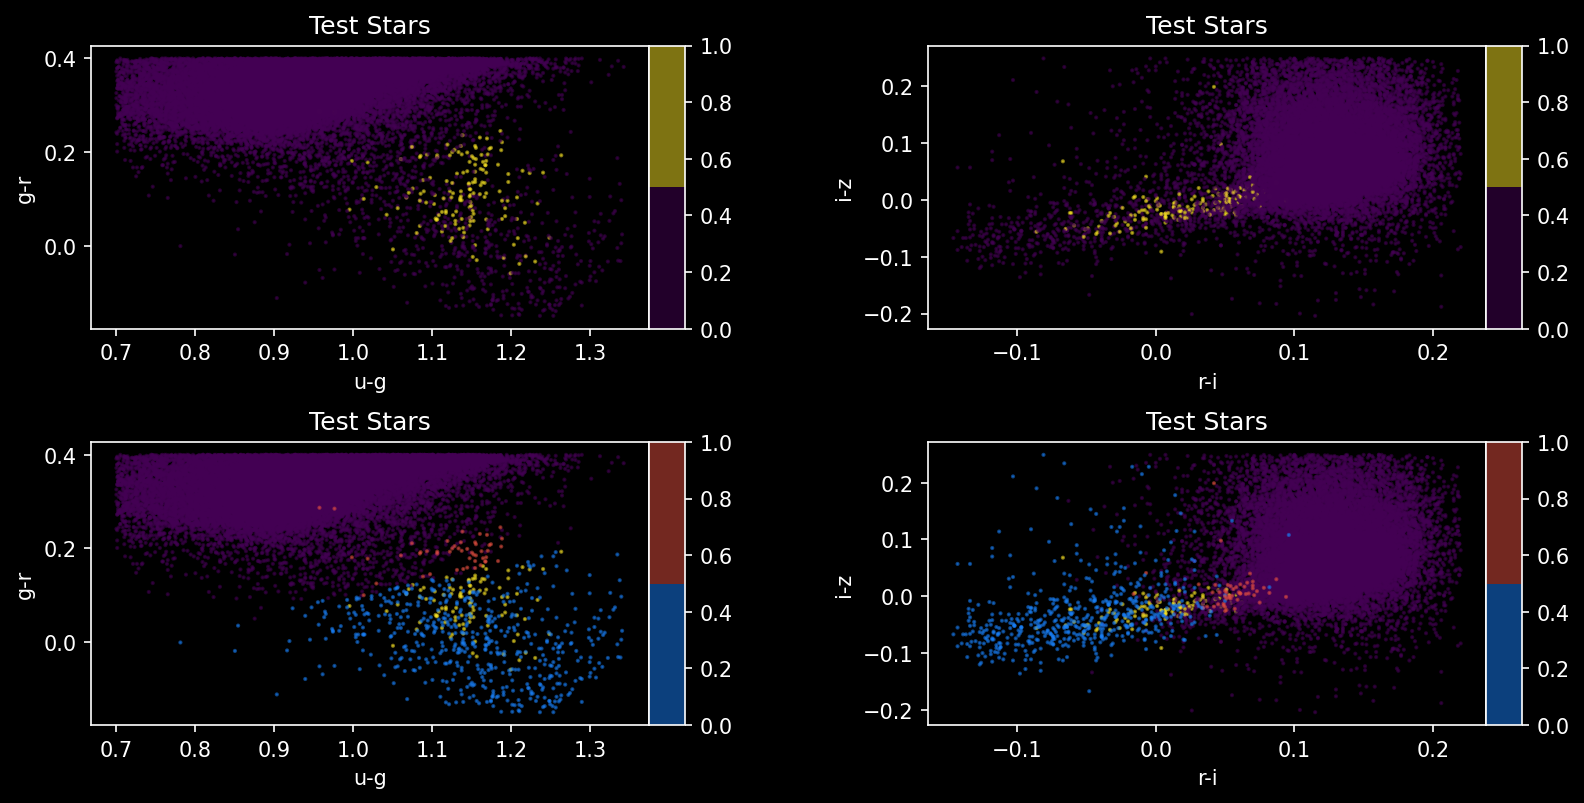

In [415]:
#
fig = plt.figure(figsize=(12,6), dpi=150)
cmap = cmplt.get_cmap("viridis", 2)
cmap2 = cmplt.get_cmap("cet_bkr", 2)

plt.subplots_adjust(wspace=0.5,hspace=0.4)

ax = fig.add_subplot(2,2,1)
sc = ax.scatter(X_test[:,0],X_test[:,1],s=1,c=y_test,alpha=0.5,cmap=cmap)
ax.set_xlabel("u-g")
ax.set_ylabel("g-r")
cax = fig.add_axes([ax.get_position().x1,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(sc, cax=cax)

ax.set_title("Test Stars");

ax = fig.add_subplot(2,2,2)
sc = ax.scatter(X_test[:,2],X_test[:,3],s=1,c=y_test,alpha=0.5,cmap=cmap)
ax.set_xlabel("r-i")
ax.set_ylabel("i-z")
cax = fig.add_axes([ax.get_position().x1,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(sc, cax=cax)

ax.set_title("Test Stars");

ax = fig.add_subplot(2,2,3)
sc = ax.scatter(X_test[y_pred==y_test,0],X_test[y_pred==y_test,1],s=1,c=y_test[y_pred==y_test],alpha=0.5,cmap=cmap)
sc = ax.scatter(X_test[y_pred!=y_test,0],X_test[y_pred!=y_test,1],s=1,c=y_test[y_pred!=y_test],alpha=0.5,cmap=cmap2)
ax.set_xlabel("u-g")
ax.set_ylabel("g-r")
cax = fig.add_axes([ax.get_position().x1,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(sc, cax=cax)

ax.set_title("Test Stars");

ax = fig.add_subplot(2,2,4)
sc = ax.scatter(X_test[y_pred==y_test,2],X_test[y_pred==y_test,3],s=1,c=y_test[y_pred==y_test],alpha=0.5,cmap=cmap)
sc = ax.scatter(X_test[y_pred!=y_test,2],X_test[y_pred!=y_test,3],s=1,c=y_test[y_pred!=y_test],alpha=0.5,cmap=cmap2)
ax.set_xlabel("r-i")
ax.set_ylabel("i-z")
cax = fig.add_axes([ax.get_position().x1,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(sc, cax=cax)

ax.set_title("Test Stars");

A simple linear cut in 4D color space would be hard to do by hand, but LDA does it in seconds! It also has significantly narrowed down what stars we need to search, while missing only a few stars that we should have searched, but may not based on this algorithim. People who do ML are OBSESSED with what metric you used to quantify how good this classification is. Do you care more about false positives or false negatives, are your classes different sizes (here there are way more background stars than rrlyrae), etc. I won't go into it now, but it is always best to think a bit out what what metric to report before settling on a number.

# FFT for Dust Smoothing

One of the most powerful representations in all of signal processing/machine learning is the fourier transform. Let's explore how to do it and its application to denoising images.

I view this as using your knowledge about the structure of the data to improve the data quality and your ability to answer a question of interest.

In [159]:
from scipy import fftpack

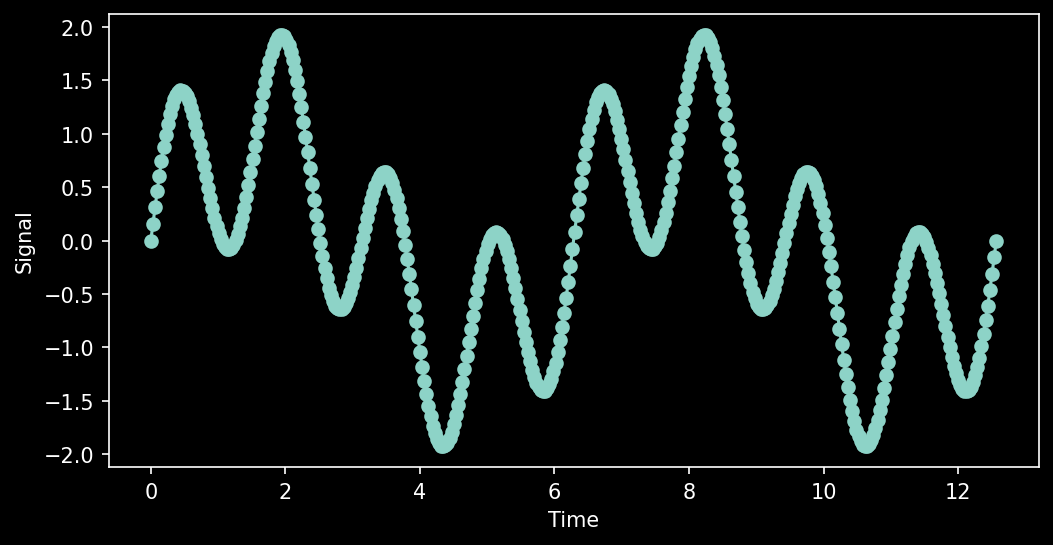

In [416]:
N = 400
Tot = 2
T = Tot/N
t = (2*np.pi)*np.linspace(0,Tot,N)
y = np.sin(t) + np.sin(4*t)

fig = plt.figure(figsize=(8,4), dpi=150)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.scatter(t,y)
ax.plot(t,y)
ax.set_xlabel("Time")
ax.set_ylabel("Signal");

In the "time domain" it may not be clear if there are 2 or 3 or 4 frequencies on top of each othere here. Let's look in the "fourier domain."

In [203]:
ffty = np.abs(fftpack.fft(y)[0:N//2])
xf = fftpack.fftfreq(N, T)[0:N//2]

There is useful information in the phase of the fourier transform, but that is a bit more advanced. Let's just look at the absolute value so we can see how much "power" is at a given frequency.

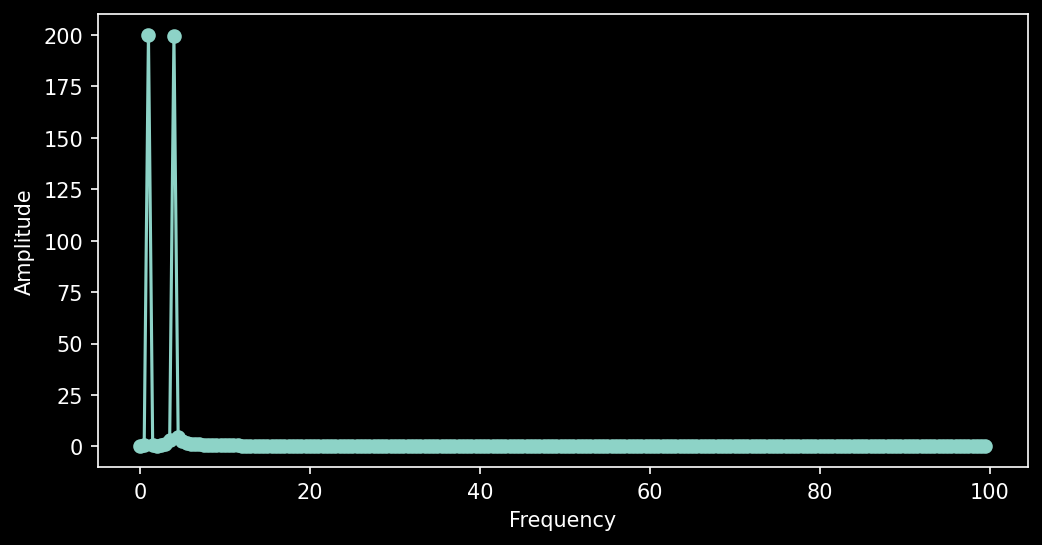

In [417]:
fig = plt.figure(figsize=(8,4), dpi=150)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.scatter(xf,ffty)
ax.plot(xf,ffty)
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude");

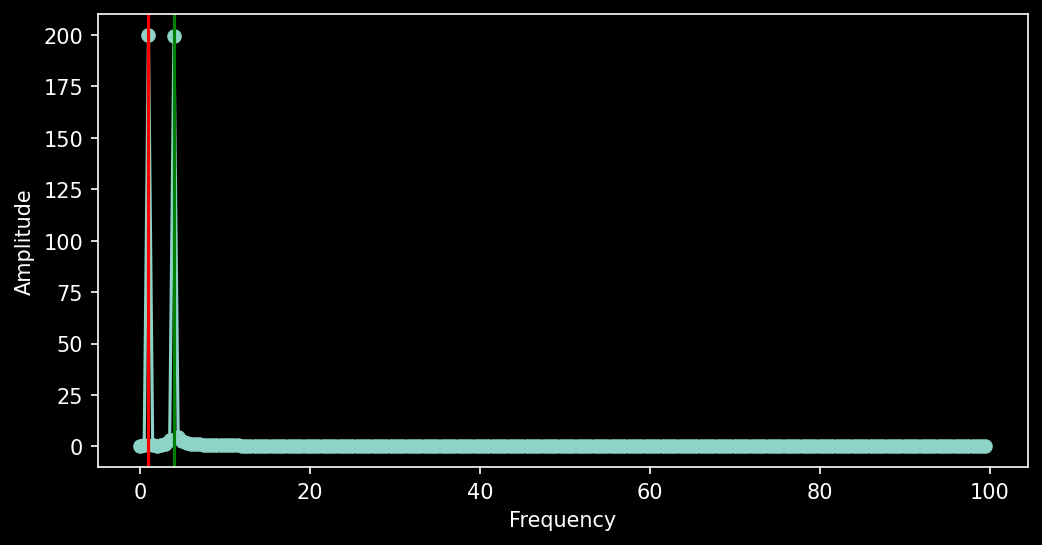

In [418]:
fig = plt.figure(figsize=(8,4), dpi=150)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.scatter(xf,ffty)
ax.plot(xf,ffty)
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude");
ax.axvline(1,0,1,color="red")
ax.axvline(4,0,1,color="green")

Let's move to the more exciting case of images where we are using the sin/cos basis in 2d. I will choose an image of interstellar dust measured in the infrared.

In [420]:
file = "/n/holystore01/LABS/finkbeiner_lab/Lab/saydjari/ExtData/WISEDust/wise_222.fits.gz"
hdul = fits.open(file)
hdul.info()
hdul.close()
#this is really great practice, super descriptive names!

Filename: /n/holystore01/LABS/finkbeiner_lab/Lab/saydjari/ExtData/WISEDust/wise_222.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  clean image    1 PrimaryHDU      38   (8000, 8000)   float32   
  1  dirty image    1 ImageHDU        37   (8000, 8000)   float32   
  2  pixel weights    1 ImageHDU        37   (8000, 8000)   uint8   
  3  minimum pixel value    1 ImageHDU        37   (8000, 8000)   float32   
  4  maximum pixel value    1 ImageHDU        37   (8000, 8000)   float32   
  5  AND mask      1 ImageHDU        37   (8000, 8000)   int32   
  6  OR mask       1 ImageHDU        37   (8000, 8000)   int32   
  7  artifact image    1 ImageHDU        37   (8000, 8000)   float32   


In [422]:
dustim = fits.getdata(file,1)

In [425]:
dustim, dustim_header = fits.getdata(file,1,header=True)

In [426]:
fits.writeto("dust.fits.gz",dustim, dustim_header)

This is my favorite colormap package. It is easy to install with conda-forge and integrates seemlessly with matplotlib.

In [423]:
import colorcet

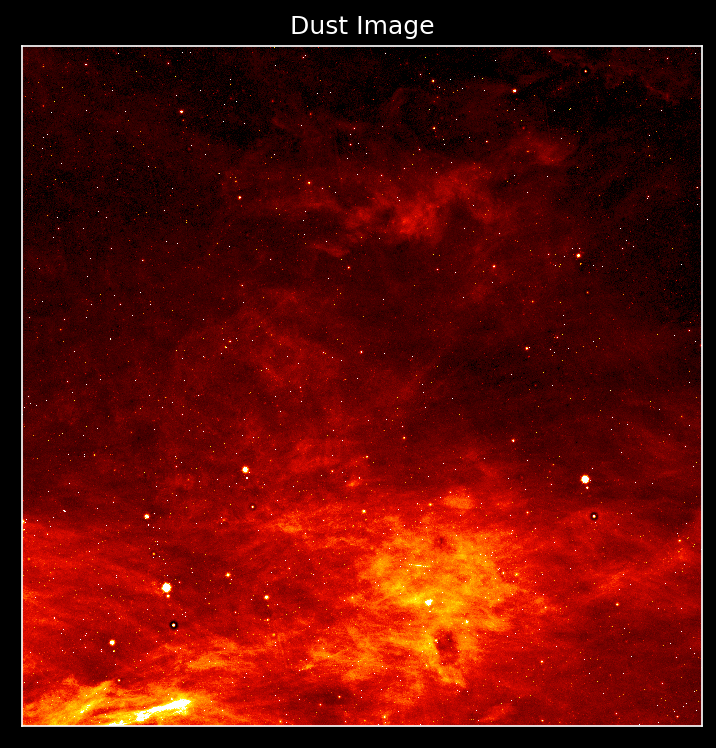

In [424]:
fig = plt.figure(figsize=(6,6), dpi=150)
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = fig.add_subplot(1,1,1)
input1 = dustim-np.median(dustim)
ax.imshow(
    input1,
    origin="lower",
    interpolation="nearest",
    cmap="cet_fire",
    aspect="equal",
    vmin=-10,
    vmax=50
)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_title("Dust Image");

Let's suppose we were annoyed by the faint stars and viewed them as noise (or that there was some gaussian random noise on top of this image that we wanted to eliminate). We know that both of these small structures in real space occur at high frequencies... and so will occur at the edges of the fourier domain.

In [227]:
im_fft = fftpack.fft2(dustim)

We plot in log10 because ffts are generally highly peaked so it makes it easier to see. We again take only the magnitude. Note we have used fftshift to put the zero frequency at the center of the image.

Text(0.5, 1.0, 'Fourier Transform of Image')

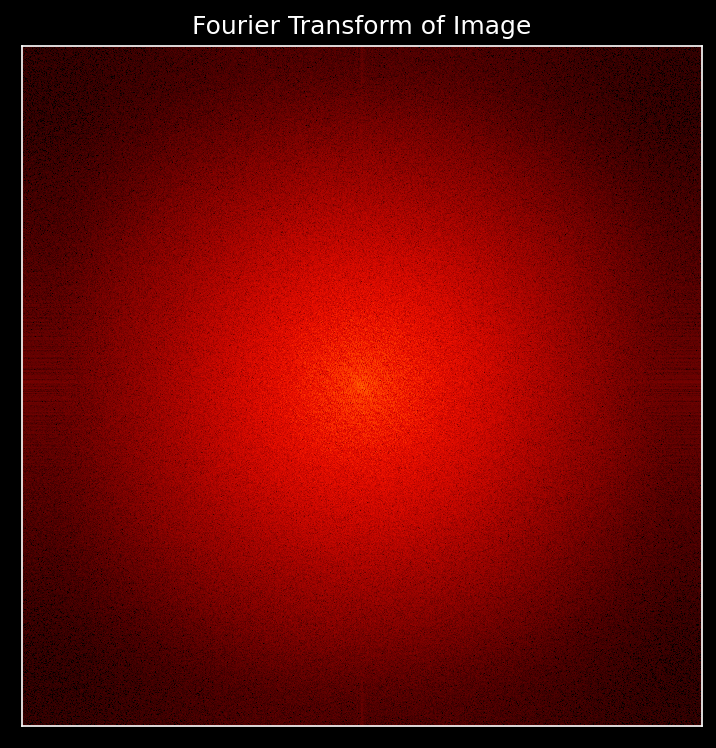

In [427]:
fig = plt.figure(figsize=(6,6), dpi=150)
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = fig.add_subplot(1,1,1)
input1 = np.log10(fftpack.fftshift(np.abs(im_fft)))
ax.imshow(
    input1,
    origin="lower",
    interpolation="nearest",
    cmap="cet_fire",
    aspect="equal",
    vmin=2,
    vmax=10
)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([]);
ax.set_title("Fourier Transform of Image")

In [243]:
input1.shape

(8000, 8000)

Let's create a mask which is just a gaussian centered at the origin

In [302]:
x = np.linspace(-4000, 3999, 8000)
y = np.linspace(-4000, 3999, 8000)
x, y = np.meshgrid(x, y)
d = np.sqrt(x*x+y*y)
sigma, mu = 100.0, 0.0
mask = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )

Text(0.5, 1.0, 'Mask')

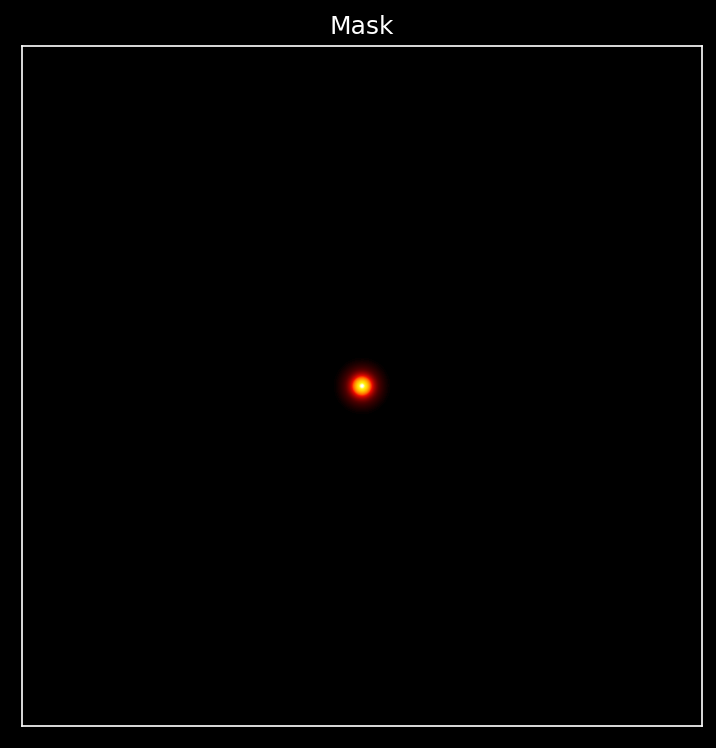

In [428]:
fig = plt.figure(figsize=(6,6), dpi=150)
ax = fig.add_subplot(1,1,1)
ax.imshow(
    mask,
    origin="lower",
    interpolation="nearest",
    cmap="cet_fire",
    aspect="equal",
)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([]);
ax.set_title("Mask")

We shift the fourier transform to be zero at the center so we can make sense of it, apply the mask, and shift back. It is a good idea to check for yourself that shifting to the center and back give you the same matrix if you do not apply any mask.

In [304]:
np.sum(fftpack.fftshift(fftpack.fftshift(im_fft)) != im_fft)

0

This image is said to be "low-pass" filtered

In [305]:
filt_im = np.abs(fftpack.ifft2(fftpack.fftshift(np.multiply(fftpack.fftshift(im_fft),mask))))

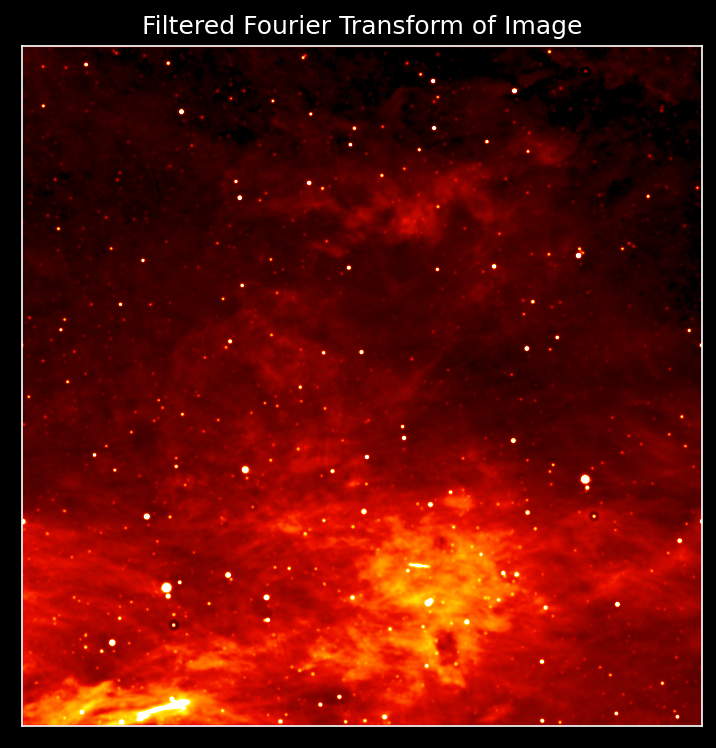

In [429]:
fig = plt.figure(figsize=(6,6), dpi=150)
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = fig.add_subplot(1,1,1)
input1 = filt_im-np.median(filt_im)
ax.imshow(
    input1,
    origin="lower",
    interpolation="nearest",
    cmap="cet_fire",
    aspect="equal",
    vmin=-10,
    vmax=50
)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_title("Filtered Fourier Transform of Image");

Let's use a multipannel figure to put this all together

/tmp/ipykernel_189326/898623492.py:49: RuntimeWarning: divide by zero encountered in log10
  input1 = np.log10(fftpack.fftshift(np.abs(im_fft))*mask)


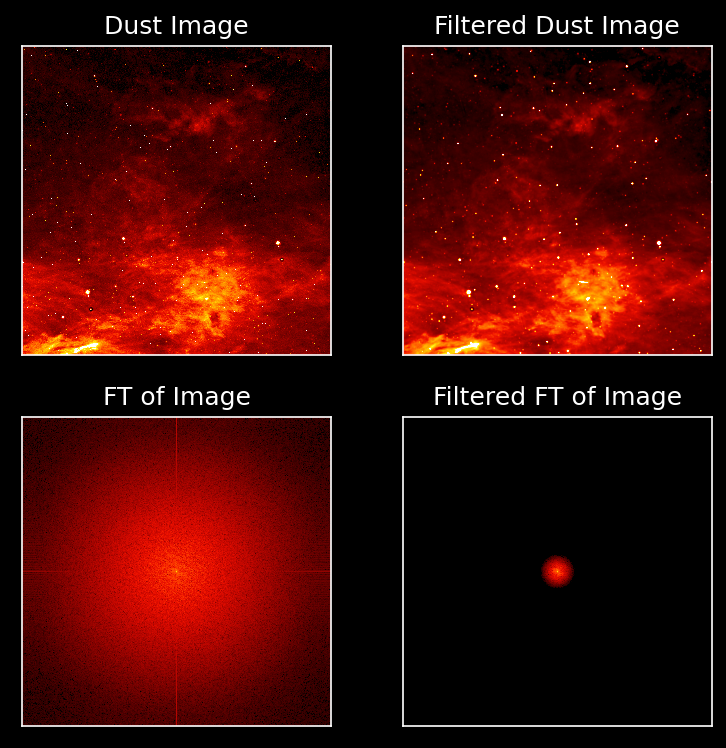

In [431]:
fig = plt.figure(figsize=(6,6), dpi=150)
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = fig.add_subplot(2,2,1)
input1 = dustim-np.median(dustim)
ax.imshow(
    input1,
    origin="lower",
    interpolation="nearest",
    cmap="cet_fire",
    aspect="equal",
    vmin=-10,
    vmax=50
)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_title("Dust Image");

ax = fig.add_subplot(2,2,2)
input1 = filt_im-np.median(filt_im)
ax.imshow(
    input1,
    origin="lower",
    interpolation="nearest",
    cmap="cet_fire",
    aspect="equal",
    vmin=-10,
    vmax=50
)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_title("Filtered Dust Image");

ax = fig.add_subplot(2,2,3)
input1 = np.log10(fftpack.fftshift(np.abs(im_fft)))
ax.imshow(
    input1,
    origin="lower",
    interpolation="nearest",
    cmap="cet_fire",
    aspect="equal",
    vmin=2,
    vmax=10
)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([]);
ax.set_title("FT of Image")

ax = fig.add_subplot(2,2,4)
input1 = np.log10(fftpack.fftshift(np.abs(im_fft))*mask)
ax.imshow(
    input1,
    origin="lower",
    interpolation="nearest",
    cmap="cet_fire",
    aspect="equal",
    vmin=2,
    vmax=10
)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([]);
ax.set_title("Filtered FT of Image");

So, knowing where certain signals or noise will appear in Fourier space can be used to extract or supress those signals in images. Convolutional Neural Networks basically "learn" (aka optimize) a mask in Fourier space that pulls out signals of interest for a problem (the "dogness" of a photo). Now, no one filter in Fourier space is equal to "dogness" but the NN part of CNNs is a network of filters and function approximations (like the polynomial fits you know) to create an effective filter that captures "dogness"). This filter was very simple. It captures only signals on scales corresponding to frequencies within the mask.